# LIMEtree experiments

In [1]:
import logging
import pickle

import numpy as np
import scripts.image_classifier as imgclf

from scripts.limetree import (
    logger,
    explain_image,
    compute_loss, process_loss, summarise_loss_lime, summarise_loss_limet,
    plot_loss_summary)

22-Sep-05 15:03:43 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


In [2]:
# logging.basicConfig(level=logging.DEBUG)
logger.setLevel(logging.DEBUG)

%matplotlib inline

In [3]:
clf = imgclf.ImageClassifier(use_gpu=False)
img_path = './img/dog_ball.jpg'

## Test Processing Images

In [4]:
img_path_, top_pred, similarities, lime, limet = explain_image(
    img_path, clf, random_seed=42, n_top_classes=3,
    batch_size=50,                              # Processing
    segmenter_type='slic',                      # Segmenter Type
    n_segments=13,                              # Slic Segmenter
    occlusion_colour='black',                   # Occluder
    generate_complete_sample=True,              # Sampler
    kernel_width=0.25)                          # Similarity

22-Sep-05 15:03:46 scripts.limetree DEBUG    Image: ./img/dog_ball.jpg
22-Sep-05 15:03:46 scripts.limetree DEBUG    Image: ./img/dog_ball.jpg
22-Sep-05 15:03:46 scripts.limetree DEBUG    Segmenter in use: slic
22-Sep-05 15:03:46 scripts.limetree DEBUG    Segmenter in use: slic
/python/python3.7/site-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()
22-Sep-05 15:03:46 scripts.limetree DEBUG    Top n classes: 3
22-Sep-05 15:03:46 scripts.limetree DEBUG    Top n classes: 3
22-S

In [5]:
assert img_path == img_path_, 'Expect the same image'
assert np.array_equal(top_pred, [852, 207, 208]), 'Expect correct predictions'

## Run Sample Processor

In [6]:
sample_images = [img_path]
collector = {}

for img in sample_images:
    img_path_, top_pred, similarities, lime, limet = explain_image(
        img, clf, random_seed=42, n_top_classes=3,
        batch_size=50,                              # Processing
        segmenter_type='slic',                      # Segmenter Type
        n_segments=13,                              # Slic Segmenter
        occlusion_colour='black',                   # Occluder
        generate_complete_sample=True,              # Sampler
        kernel_width=0.25)                          # Similarity
    logger.debug(f'Processed image: {img_path_}')
    collector[img_path_] = (top_pred, similarities, lime, limet)

22-Sep-05 15:04:23 scripts.limetree DEBUG    Image: ./img/dog_ball.jpg
22-Sep-05 15:04:23 scripts.limetree DEBUG    Image: ./img/dog_ball.jpg
22-Sep-05 15:04:23 scripts.limetree DEBUG    Segmenter in use: slic
22-Sep-05 15:04:23 scripts.limetree DEBUG    Segmenter in use: slic
22-Sep-05 15:04:24 scripts.limetree DEBUG    Top n classes: 3
22-Sep-05 15:04:24 scripts.limetree DEBUG    Top n classes: 3
22-Sep-05 15:04:24 fatf         INFO     Seeding RNGs using the input parameter.
22-Sep-05 15:04:24 fatf         INFO     Seeding RNGs with 42.
22-Sep-05 15:04:24 scripts.limetree DEBUG    Segments number: 4
22-Sep-05 15:04:24 scripts.limetree DEBUG    Segments number: 4
22-Sep-05 15:04:24 scripts.limetree DEBUG    Sampled data shape: (16, 4)
22-Sep-05 15:04:24 scripts.limetree DEBUG    Sampled data shape: (16, 4)
22-Sep-05 15:04:26 fatf         INFO     Seeding RNGs using the input parameter.
22-Sep-05 15:04:26 fatf         INFO     Seeding RNGs with 42.
22-Sep-05 15:04:53 scripts.limetree 

In [7]:
with open('limet_sample.pickle', 'wb') as w_file:
    pickle.dump(collector, w_file,
                protocol=pickle.HIGHEST_PROTOCOL)


## Analyse Data

In [8]:
with open('limet_sample.pickle', 'rb') as r_file:
    collector = pickle.load(r_file)

In [9]:
print(f'Number of processed images: {len(collector.keys())}')

Number of processed images: 1


In [10]:
top_classes, lime_scores, limet_scores = process_loss(collector)

22-Sep-05 15:04:56 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-05 15:04:56 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-05 15:04:56 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-05 15:04:56 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-05 15:04:56 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-05 15:04:56 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-05 15:04:56 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-05 15:04:56 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-05 15:04:56 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-05 15:04:56 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-05 15:04:56 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-05 15:04:56 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-S

In [11]:
lime_scores_summary = summarise_loss_lime(lime_scores, top_classes)

In [12]:
limet_scores_summary = summarise_loss_limet(limet_scores, top_classes)

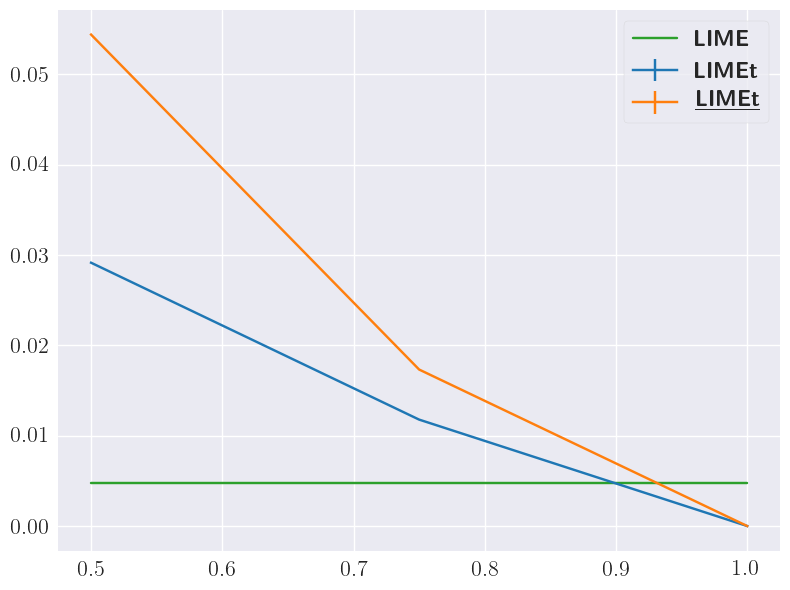

In [13]:
# NBVAL_IGNORE_OUTPUT
plot_loss_summary(lime_scores_summary, limet_scores_summary,
                  2, use_limet_loss=False,
                  use_weighted=True, use_random=False)